In [161]:
def TotalSumofSquares(y_avg,dataframe,column):
    sum=0
    for i in dataframe[column]:
        sum=sum+((i-y_avg)**2)

    return sum

In [162]:
def SumofSquares_byRegression(y_avg,dataframe,column_x,slope,intercept):
    sum=0
    for i in dataframe[column_x]:
        predicted_y=i*slope + intercept
        sum=sum+(predicted_y-y_avg)**2

    return sum

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:

df=pd.read_csv("C:\\Users\\souma\\college\\udemy\\machine learning course\\UNZIP_FOR_NOTEBOOKS_FINAL\\08-Linear-Regression-Models\\Advertising.csv")

In [165]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [166]:
df['total_spent']=df['TV']+df['newspaper']+df['sales']

In [167]:
df['total_spent']

0      321.4
1      100.0
2       95.8
3      228.5
4      252.1
       ...  
195     59.6
196    112.0
197    196.2
198    375.3
199    254.2
Name: total_spent, Length: 200, dtype: float64

In [168]:
df

,TV,radio,newspaper,sales,total_spent
0,230.1,37.8,69.2,22.1,321.4
1,44.5,39.3,45.1,10.4,100.0
2,17.2,45.9,69.3,9.3,95.8
3,151.5,41.3,58.5,18.5,228.5
4,180.8,10.8,58.4,12.9,252.1
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,59.6
196,94.2,4.9,8.1,9.7,112.0
197,177.0,9.3,6.4,12.8,196.2
198,283.6,42.0,66.2,25.5,375.3


<Axes: xlabel='total_spent', ylabel='sales'>

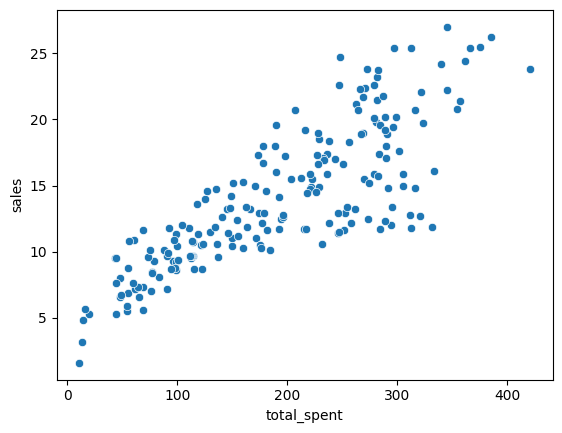

In [169]:
sns.scatterplot(data=df,x='total_spent',y='sales')

In [170]:
len(df)

200

In [171]:
df_train=df.iloc[:180,:]
df_test=df.iloc[180:,:]

In [172]:
df_test

,TV,radio,newspaper,sales,total_spent
180,156.6,2.6,8.3,10.5,175.4
181,218.5,5.4,27.4,12.2,258.1
182,56.2,5.7,29.7,8.7,94.6
183,287.6,43.0,71.8,26.2,385.6
184,253.8,21.3,30.0,17.6,301.4
185,205.0,45.1,19.6,22.6,247.2
186,139.5,2.1,26.6,10.3,176.4
187,191.1,28.7,18.2,17.3,226.6
188,286.0,13.9,3.7,15.9,305.6
189,18.7,12.1,23.4,6.7,48.8


In [173]:
df_train

,TV,radio,newspaper,sales,total_spent
0,230.1,37.8,69.2,22.1,321.4
1,44.5,39.3,45.1,10.4,100.0
2,17.2,45.9,69.3,9.3,95.8
3,151.5,41.3,58.5,18.5,228.5
4,180.8,10.8,58.4,12.9,252.1
...,...,...,...,...,...
175,276.9,48.9,41.8,27.0,345.7
176,248.4,30.2,20.3,20.2,288.9
177,170.2,7.8,35.2,11.7,217.1
178,276.7,2.3,23.7,11.8,312.2


## TRAINING

In [174]:
x_bar=float(df_train['total_spent'].mean())

In [175]:
x_bar

191.89777777777778

In [176]:
y_bar=float(df_train['sales'].mean())

In [177]:
y_bar

14.022222222222222

In [178]:
x_bar_sq=x_bar**2

In [179]:
x_bar_sq

36824.75711604938

In [180]:
xy_bar=float((df_train["sales"]*df['total_spent']).mean())

In [181]:
xy_bar

3079.968777777777

In [182]:
x_sq_bar=float((df_train['total_spent']**2).mean())

In [183]:
x_sq_bar

45424.126

In [184]:
gradient=((x_bar*y_bar)-xy_bar)/(x_bar_sq-x_sq_bar)

In [185]:
gradient

0.04525163405345021

In [186]:
intercept=y_bar-x_bar*gradient

In [187]:
intercept

5.338534206551913

<Axes: xlabel='total_spent', ylabel='sales'>

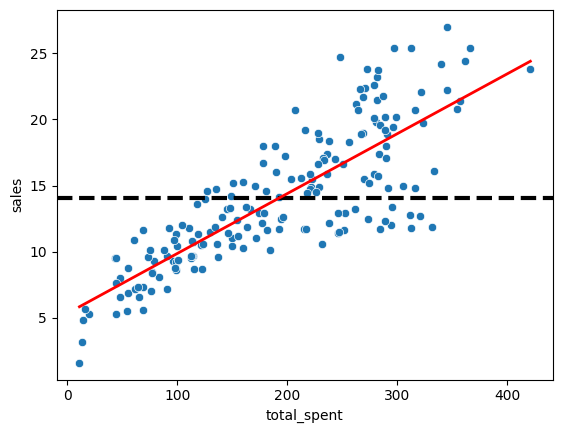

In [188]:
sns.scatterplot(data=df_train,x='total_spent',y='sales')
#add horizontal average line 
plt.axhline(y=np.nanmean(df_train['sales']),color='black',lw=3,ls='--')
x = df_train['total_spent']
y = gradient * x + intercept
sns.lineplot(x=x,y=y,color='red',lw=2)

In [189]:
SST=TotalSumofSquares(y_bar,df_train,'sales')

In [190]:
SST

4727.93111111111

In [191]:
SSR=SumofSquares_byRegression(y_bar,df_train,'total_spent',gradient,intercept)

In [192]:
SSR

3169.6230534975502

In [193]:
R_sq=SSR/SST

In [194]:
R_sq

0.6704038149051326

## TESTING

In [195]:
y_bar_testing=float(df_test['sales'].mean())

<Axes: xlabel='total_spent', ylabel='sales'>

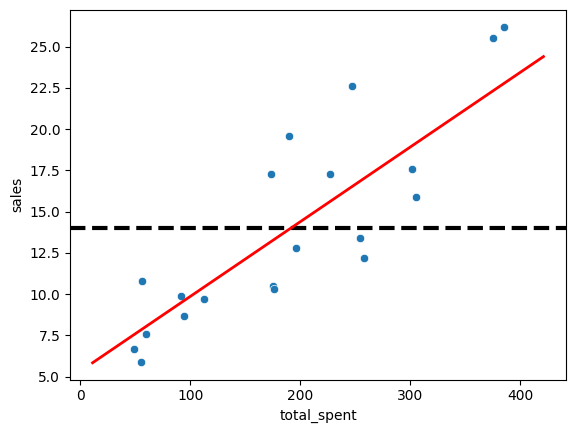

In [196]:
sns.scatterplot(data=df_test,x='total_spent',y='sales')
plt.axhline(y=np.nanmean(df_test['sales']),color='black',lw=3,ls='--')
x = df_train['total_spent']
y = gradient * x + intercept
sns.lineplot(x=x,y=y,color='red',lw=2)

In [197]:
SST_testing=TotalSumofSquares(y_bar_testing,df_test,'sales')

In [198]:
SST_testing

689.2175

In [199]:
SSR_testing=SumofSquares_byRegression(y_bar_testing,df_test,'total_spent',gradient,intercept)

In [200]:
SSR_testing

431.4433890921817

In [201]:
R_sq_testing=SSR_testing/SST_testing

In [202]:
R_sq_testing

0.6259901832036792